# Inspect single time steps of the vKdV output with realistic (AR model) boundary conditions

In [1]:
import h5py
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob

In [2]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize'] = 'medium'

In [5]:
# Load the filed data
###########
#basedir = 'C:\Projects\ARCHub\DATA\FIELD\ShellCrux\'
basedir = '/home/mrayson/group/mrayson/DATA/FIELD/ShellCrux/'
# ncfile = '/home/suntans/Projects/ARCHub/DATA/FIELD/ShellCrux/KP150_Fitted_Buoyancy_wout_motion.nc'
ncfile = '{}/KP150_Fitted_Buoyancy_wout_motion_unvenfilt.nc'.format(basedir)

mode = 0
###########

ds1 = xr.open_dataset(ncfile,group='KP150_phs1')
ds2 = xr.open_dataset(ncfile,group='KP150_phs2')

# Merge the two

A_n = xr.concat([ds1['A_n'][:,mode],ds2['A_n'][:,mode]], dim='time')
#a0 = xr.concat([ds1['amp'][:,mode,0],ds2['amp'][:,mode,0]], dim='timeslow')

# Quality control
A_n.loc['2016-09-18':'2016-10-31']=np.nan

In [6]:
def load_vkdv_h5(vkdvfile):
    # Get the time from the beta file
    with h5py.File(vkdvfile,'r') as f:
        time=np.array(f['time']).astype('<M8[ns]')
        a0 = f['a0'][:]
        A = f['A'][:]
        Amax = f['max_amplitude'][:]
        #z_std = np.array(f['data/z_std'])
        #rho_std = np.array(f['data/rho_std'])
        #rho_mu = np.array(f['data/rho_mu'])
    
    return time, a0, A, Amax
    #nparams, nt, nsamples = beta_samples.shape
    #return xr.DataArray(beta_samples, dims=('params','time','draw'), 
    #             coords={'time':t_beta,'params':range(nparams), 'draw':range(nsamples)})

In [7]:
!ls ../output/

2021-08-02--07-06-20_slim-seasonal_a0_clim_rho_v4_magnus_kdv_runs.nc
2021-08-02--07-07-20_slim-stoch_a0_data_rho_v4_magnus_kdv_runs.nc
2021-08-02--07-07-39_slim-seasonal_a0_data_rho_v4_magnus_kdv_runs.nc
2021-08-02--07-08-49_slim-harmo_a0_data_rho_v4_magnus_kdv_runs.nc
2021-08-02--07-09-41_slim-harmo_a0_clim_rho_v4_magnus_kdv_runs.nc
slim-AR_a0_harmonic_beta
slim-harmo_a0_clim_rho
slim-harmo_a0_clim_rho_v2
slim-harmo_a0_clim_rho_v3
slim-harmo_a0_clim_rho_v4
slim-harmo_a0_data_rho
slim-harmo_a0_data_rho_v2
slim-harmo_a0_data_rho_v3
slim-harmo_a0_data_rho_v4
slim-harmonic_beta_band6_a0_bugfix
slim-harmonic_beta_nonstat_a0_bugfix
slim-harmonic_beta_pred_a0_bugfix
slim-seasonal_a0_clim_rho_v3
slim-seasonal_a0_clim_rho_v4
slim-seasonal_a0_data_rho_hydrostatic
slim-seasonal_a0_data_rho_v3
slim-seasonal_a0_data_rho_v4
slim-stoch_a0_clim_rho
slim-stoch_a0_clim_rho_v2
slim-stoch_a0_clim_rho_v3
slim-stoch_a0_data_rho
slim-stoch_a0_data_rho_v2
slim-stoch_a0_data_rho_v3


In [8]:
def plot_A(testfile):
    time, a0, A, Amax = load_vkdv_h5(testfile)

    nsample = A.shape[0]


    # Calculate the median and credible intervals
    A_50 = np.median(A, axis=0)
    A_5 = np.percentile(A, 5, axis=0)
    A_95 = np.percentile(A, 95, axis=0)
    A_1 = np.percentile(A, 1, axis=0)
    A_99 = np.percentile(A, 99, axis=0)

    Aobs = A_n.sel(time=slice(time[0],time[-1]))


    #plt.figure()
    for ii in range(0,nsample,5):
         plt.plot(time,A[ii,:],'navy',lw=0.2, alpha=0.5)
         #plt.plot(time,a0[ii,:],'navy',lw=0.2)
    plt.plot(time, A_50, '--', c='0.2')
#     plt.fill_between(time, A_1, A_99, color='0.7', alpha=0.4)
    plt.fill_between(time, A_5, A_95, color='0.4', alpha=0.5) # 0.9 credible intervals

    Aobs.plot(c='r', lw=0.5)    
    plt.ylim(-70,70)
    plt.xlim(time[0],time[-1])
    plt.title('')
    plt.ylabel('A [m]')
# plt.xticks(rotation=17)

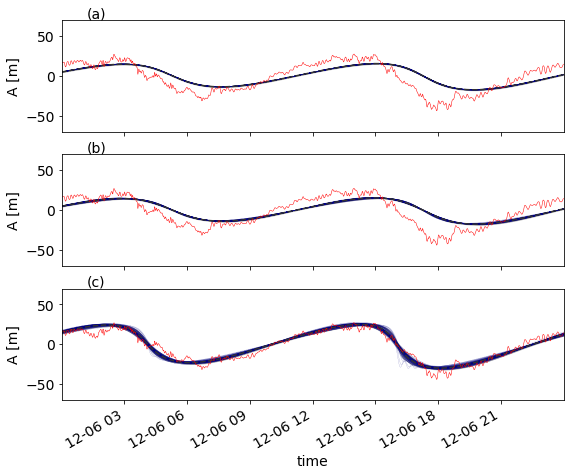

In [19]:
# testfile = '../output/slim-AR_a0_harmonic_beta/2020-12-18--18-04-08_timepoint-333_output.h5'
scenario1 = 'slim-harmo_a0_data_rho_v4'
scenario2 = 'slim-harmo_a0_clim_rho_v4'
# scenario3 = 'slim-stoch_a0_clim_rho_v3'
scenario3 = 'slim-seasonal_a0_clim_rho_v4'


# tstep = 333 # March-30
# tstep = 336 # April-2
# tstep = 338 # April-4

# tstep = 322 # March-19
# tstep = 289 # Feb-14
# tstep = 69 # July-7
tstep = 219 # Dec-6
# tstep = 199 # Nov-



file1 = glob('../output/{}/*_timepoint-{}_output.h5'.format(scenario1, tstep))[0]
file2 = glob('../output/{}/*_timepoint-{}_output.h5'.format(scenario2, tstep))[0]
file3 = glob('../output/{}/*_timepoint-{}_output.h5'.format(scenario3, tstep))[0]

file1,file2

plt.figure(figsize=(9,7))
ax0=plt.subplot(311)
plot_A(file1)
ax0.set_xticklabels([])
plt.xlabel('')
plt.text(0.05, 1.02, '(a)', transform=ax0.transAxes)
ax1=plt.subplot(312)
plot_A(file2)
ax1.set_xticklabels([])
plt.xlabel('')
plt.text(0.05, 1.02, '(b)', transform=ax1.transAxes)

ax2=plt.subplot(313)
plot_A(file3)
plt.text(0.05, 1.02, '(c)', transform=ax2.transAxes)

plt.savefig('../FIGURES/vkdv_A_comparison_tstep_{}.png'.format(tstep), dpi=150)

<IPython.core.display.Javascript object>


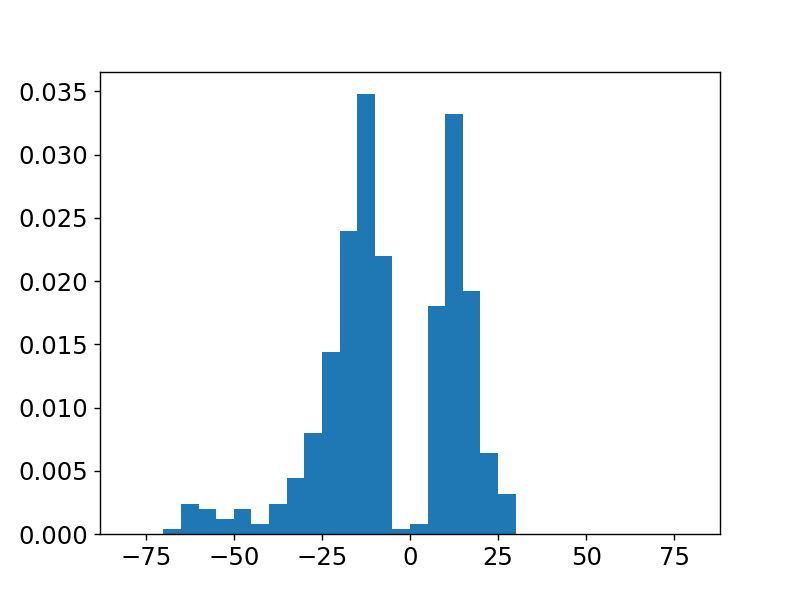

/home/mrayson/group/mrayson/miniconda3/envs/soda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


4.3999999999999995

In [71]:
plt.figure()
plt.hist(Amax, bins=np.arange(-80,85,5), normed=True)

N = Amax.shape[0]
P40 = np.sum(Amax<-40)/N*100
P40

16.400000000000002